In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv('titanic_train.csv')

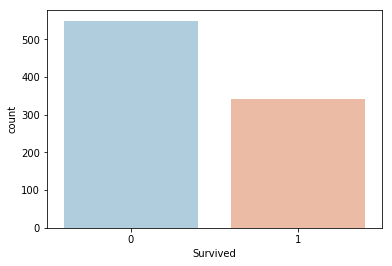

In [3]:
sns.countplot(x='Survived',data=train,palette='RdBu_r')

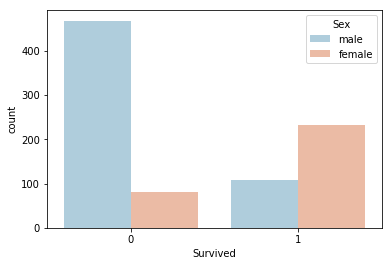

In [4]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

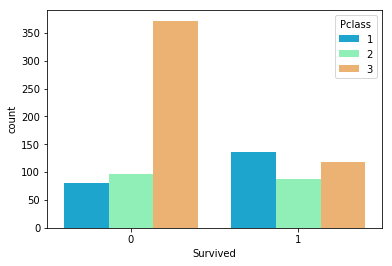

In [5]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

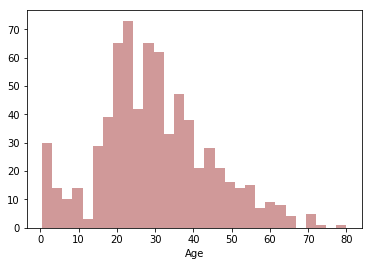

In [6]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

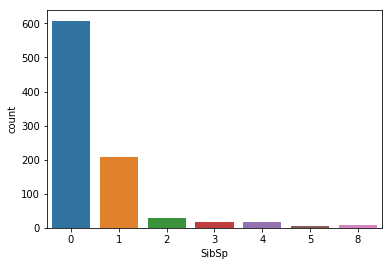

In [7]:
sns.countplot(x='SibSp',data=train)

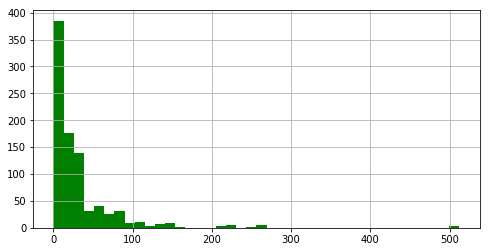

In [8]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

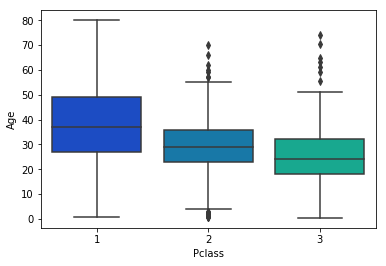

In [9]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

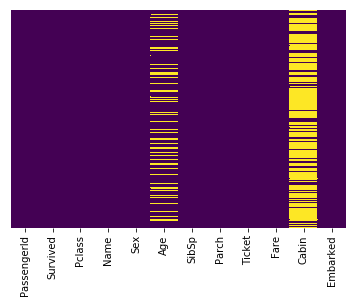

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return train.groupby('Pclass').mean()['Age'].iloc[0]

        elif Pclass == 2:
            return train.groupby('Pclass').mean()['Age'].iloc[1]

        else:
            return train.groupby('Pclass').mean()['Age'].iloc[2]

    else:
        return Age

    
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [12]:
train.drop('Cabin', axis=1, inplace=True)

In [13]:
train.dropna(inplace=True)

In [14]:
X = train.loc[:, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train.loc[:, 'Survived']

In [15]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.032411,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.055278,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.400919,0.081656,0.016824,-0.548193
Age,0.032411,-0.055278,-0.400919,1.000000,-0.242737,-0.174818,0.118050
SibSp,-0.057686,-0.034040,0.081656,-0.242737,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.174818,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.118050,0.160887,0.217532,1.000000


In [16]:
sex = pd.get_dummies(X['Sex'], prefix = 'Sex')
sex.drop('Sex_male', inplace = True, axis=1)

embark = pd.get_dummies(X['Embarked'], prefix = 'Embarked', drop_first=True)

passenger_class = pd.get_dummies(X['Pclass'], prefix = 'Pclass')
passenger_class.drop('Pclass_3', inplace = True, axis=1)

X.drop(['Sex','Embarked','Pclass'],axis=1,inplace=True)
X = pd.concat([X,sex,embark, passenger_class],axis=1)

Text(0.5, 1.0, 'Outlier Box Plot')

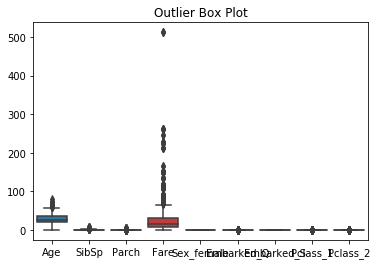

In [17]:
sns.boxplot(data= X).set_title("Outlier Box Plot")

In [18]:
linearity_check_df = pd.concat([pd.DataFrame(X),y],axis=1)

/home/kartikchauhan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Log Odds Linear Plot')

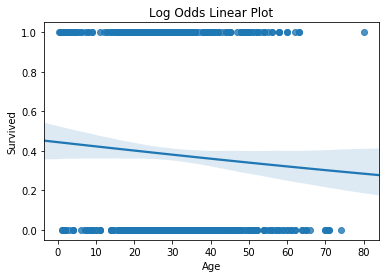

In [19]:
sns.regplot(x= 'Age', y= 'Survived', data= linearity_check_df, logistic= True).set_title("Log Odds Linear Plot")

Text(0.5, 1.0, 'Log Odds Linear Plot')

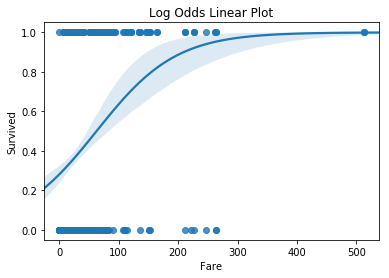

In [20]:
sns.regplot(x= 'Fare', y= 'Survived', data= linearity_check_df, logistic= True).set_title("Log Odds Linear Plot")

Text(0.5, 1.0, 'Log Odds Linear Plot')

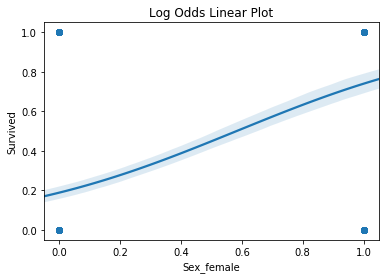

In [21]:
sns.regplot(x= 'Sex_female', y= 'Survived', data= linearity_check_df, logistic= True).set_title("Log Odds Linear Plot")

In [22]:
import statsmodels.api as sm
X_set = X[['Age', 'SibSp', 'Sex_female', 'Pclass_1', 'Pclass_2']]
X_set = sm.add_constant(X_set)
logit_model=sm.Logit(y,X_set)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.442156
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.335     
Dependent Variable: Survived         AIC:              798.1537  
Date:               2019-04-22 09:58 BIC:              826.8943  
No. Observations:   889              Log-Likelihood:   -393.08   
Df Model:           5                LL-Null:          -591.41   
Df Residuals:       883              LLR p-value:      1.5532e-83
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -0.9900    0.2577  -3.8412  0.0001  -1.4952  -0.4849
Age           -0.0445    0.0082  -5.4351  0.0000  -0.0605  -0.

In [23]:
model_odds = pd.DataFrame(np.exp(result.params), columns= ['Odds Ratio'])
model_odds['z-value']= result.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(result.conf_int())
model_odds

,Odds Ratio,z-value,2.5%,97.5%
const,0.371560,1.224306e-04,0.224201,0.615772
Age,0.956481,5.475321e-08,0.941256,0.971951
SibSp,0.688691,3.744792e-04,0.560770,0.845794
Sex_female,15.400884,1.490541e-44,10.503403,22.581941
Pclass_1,12.407821,1.299255e-22,7.492673,20.547277
Pclass_2,3.423896,7.489074e-08,2.186535,5.361481


In [24]:
model_odds_percentage = pd.DataFrame((np.exp(result.params)-1)*100, columns= ['Odds Percentage'])
model_odds_percentage

,Odds Percentage
const,-62.844049
Age,-4.351921
SibSp,-31.130862
Sex_female,1440.088408
Pclass_1,1140.782098
Pclass_2,242.389640


In [25]:
X_set = X[[]]
X_set = sm.add_constant(X_set)
logit_model=sm.Logit(y,X_set)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.665252
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.000    
Dependent Variable: Survived         AIC:              1184.8178
Date:               2019-04-22 09:59 BIC:              1189.6079
No. Observations:   889              Log-Likelihood:   -591.41  
Df Model:           0                LL-Null:          -591.41  
Df Residuals:       888              LLR p-value:      nan      
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     4.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
const    -0.4792     0.0690   -6.9430   0.0000   -0.6144   -0.3439



In [26]:
crosstab = pd.crosstab(train['Survived'], train['Sex'], rownames=['Survived'], colnames=['Sex'], margins=True)

crosstab

Sex,female,male,All
Survived,,,
0,81,468,549
1,231,109,340
All,312,577,889


In [27]:
p = 340/889
p

0.38245219347581555

In [28]:
odds = p/(1-p)
odds

0.6193078324225867

In [29]:
log_odds = np.log(odds)
log_odds

-0.4791528238993233

In [30]:
X_set = X[['Sex_female']]
X_set = sm.add_constant(X_set)
logit_model=sm.Logit(y,X_set)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.515526
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.225     
Dependent Variable: Survived         AIC:              920.6061  
Date:               2019-04-22 10:40 BIC:              930.1863  
No. Observations:   889              Log-Likelihood:   -458.30   
Df Model:           1                LL-Null:          -591.41   
Df Residuals:       887              LLR p-value:      7.5957e-60
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
const        -1.4571    0.1064  -13.7007  0.0000  -1.6656  -1.2487
Sex_female    2.5051    0.1673   14.9746  0.0000   2.1772   2.

In [31]:
crosstab

Sex,female,male,All
Survived,,,
0,81,468,549
1,231,109,340
All,312,577,889


In [32]:
male_odds_surviving = 109/468
male_odds_surviving

0.2329059829059829

In [33]:
female_odds_surviving = 231/81
female_odds_surviving

2.8518518518518516

In [34]:
odds_ratio_female_to_male = female_odds_surviving/male_odds_surviving
odds_ratio_female_to_male

12.244648318042811

In [35]:
(odds_ratio_female_to_male - 1) * 100

1124.4648318042812

In [36]:
np.log(male_odds_surviving)

-1.457120413688503

In [37]:
np.log(odds_ratio_female_to_male)

2.5050889695378578

In [38]:
np.exp(np.log(odds_ratio_female_to_male))

12.244648318042813

In [39]:
X_set = X[['Sex_female']]
X_set = sm.add_constant(X_set)
logit_model=sm.Logit(y,X_set)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.515526
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.225     
Dependent Variable: Survived         AIC:              920.6061  
Date:               2019-04-22 10:43 BIC:              930.1863  
No. Observations:   889              Log-Likelihood:   -458.30   
Df Model:           1                LL-Null:          -591.41   
Df Residuals:       887              LLR p-value:      7.5957e-60
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
const        -1.4571    0.1064  -13.7007  0.0000  -1.6656  -1.2487
Sex_female    2.5051    0.1673   14.9746  0.0000   2.1772   2.

In [40]:
model_odds = pd.DataFrame(np.exp(result.params), columns= ['Odds Ratio'])
model_odds['z-value']= result.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(result.conf_int())
model_odds

,Odds Ratio,z-value,2.5%,97.5%
const,0.232906,1.005085e-42,0.189083,0.286886
Sex_female,12.244648,1.076430e-50,8.821640,16.995867


In [41]:
model_odds_percentage = pd.DataFrame((np.exp(result.params)-1)*100, columns= ['Odds Percentage'])
model_odds_percentage

,Odds Percentage
const,-76.709402
Sex_female,1124.464832


In [42]:
X_set = X[['Age']]
X_set = sm.add_constant(X_set)
logit_model=sm.Logit(y,X_set)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.663714
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.002    
Dependent Variable: Survived         AIC:              1184.0837
Date:               2019-04-22 10:44 BIC:              1193.6639
No. Observations:   889              Log-Likelihood:   -590.04  
Df Model:           1                LL-Null:          -591.41  
Df Residuals:       887              LLR p-value:      0.098230 
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     4.0000                                      
------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
------------------------------------------------------------------
const     -0.2254     0.1681   -1.3412   0.1799   -0.5549   0.1040
Age       -0.0087     0.0053   -1.6451   0.1000   -0.0191   0.0017



In [43]:
np.exp(-0.2254)

0.7981968761446542

In [44]:
-0.2254 + (-0.0087) * 54

-0.6952

In [45]:
-0.2254 + (-0.0087) * 55

-0.7039

In [47]:
difference = (-0.2254 + (-0.0087) * 55) - (-0.2254 + (-0.0087) * 54)
difference

-0.00869999999999993

In [48]:
exp_difference = np.exp(difference)
exp_difference

0.9913377354877927

In [49]:
(exp_difference - 1) * 100

-0.8662264512207307

In [50]:
model_odds = pd.DataFrame(np.exp(result.params), columns= ['Odds Ratio'])
model_odds['z-value']= result.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(result.conf_int())
model_odds

,Odds Ratio,z-value,2.5%,97.5%
const,0.798160,0.179860,0.574126,1.109615
Age,0.991308,0.099955,0.981052,1.001672


In [51]:
model_odds_percentage = pd.DataFrame((np.exp(result.params)-1)*100, columns= ['Odds Percentage'])
model_odds_percentage

,Odds Percentage
const,-20.183999
Age,-0.869153


In [53]:
X_set = X[['Age', 'SibSp', 'Sex_female', 'Pclass_1', 'Pclass_2']]
X_set = sm.add_constant(X_set)
logit_model=sm.Logit(y,X_set)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.442156
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.335     
Dependent Variable: Survived         AIC:              798.1537  
Date:               2019-04-22 10:52 BIC:              826.8943  
No. Observations:   889              Log-Likelihood:   -393.08   
Df Model:           5                LL-Null:          -591.41   
Df Residuals:       883              LLR p-value:      1.5532e-83
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -0.9900    0.2577  -3.8412  0.0001  -1.4952  -0.4849
Age           -0.0445    0.0082  -5.4351  0.0000  -0.0605  -0.

In [55]:
model_odds = pd.DataFrame(np.exp(result.params), columns= ['Odds Ratio'])
model_odds['z-value']= result.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(result.conf_int())
model_odds

,Odds Ratio,z-value,2.5%,97.5%
const,0.371560,1.224306e-04,0.224201,0.615772
Age,0.956481,5.475321e-08,0.941256,0.971951
SibSp,0.688691,3.744792e-04,0.560770,0.845794
Sex_female,15.400884,1.490541e-44,10.503403,22.581941
Pclass_1,12.407821,1.299255e-22,7.492673,20.547277
Pclass_2,3.423896,7.489074e-08,2.186535,5.361481


In [57]:
model_odds_percentage = pd.DataFrame((np.exp(result.params)-1)*100, columns= ['Odds Percentage'])
model_odds_percentage

,Odds Percentage
const,-62.844049
Age,-4.351921
SibSp,-31.130862
Sex_female,1440.088408
Pclass_1,1140.782098
Pclass_2,242.389640


In [58]:
np.exp(2.7344)

15.400500363066913

In [59]:
(np.exp(2.7344)-1)*100

1440.0500363066913

In [60]:
np.exp(-0.0445)

0.9564756000936208

In [61]:
(np.exp(-0.0445)-1)*100

-4.352439990637924